Este colab fue desarrollado por Arnold Charry y Mariana Bueno.

# Set Covering Problem

Hay seis ciudades (ciudades 1 a 6) en el condado de Kilroy.  El condado debe decidir dónde construir la estación de bomberos.  Asimismo, el condado quiere construir la cantidad mínima de estaciones de bomberos necesarias para tener la certeza de que por lo menos una está dentro de 15 minutos (tiempo de manejo) de cada ciudad.  Los tiempos (en minutos) necesarios para ir en automóvil de una ciudad a otra del condado se indican en la tabla adjunta.  Plantee un modelo de PE mediante el cual Kilroy sepa cuántas estaciones de bomberos debe construir y dónde ubicarlas.

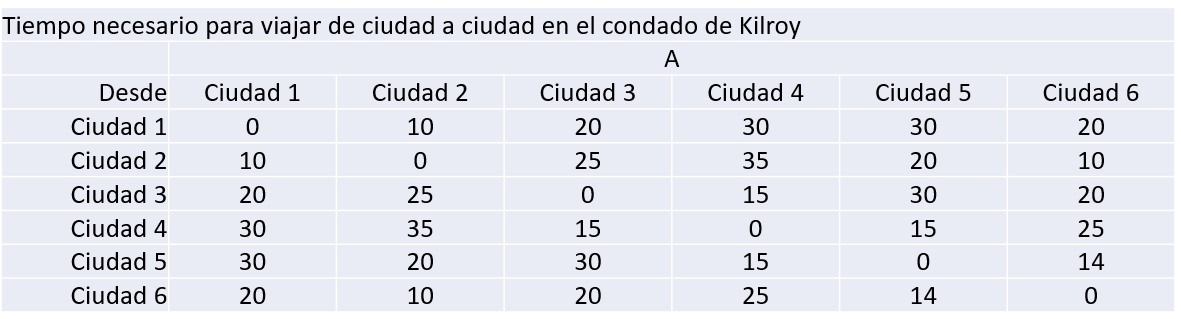

## Conjuntos

$ i = \text{Ciudad }i$

$ j = \text{Ciudad }j$

## Parámetros

$ T_{ij} = \textrm{Tiempo de la ciudad } i \textrm{ a la ciudad }j$

$ B_{ij} = \textrm{1 si la ciudad } i \textrm{ atiende a la ciudad }j, \textrm{ 0 de lo contrario }$


## Variables de decisión

$ x_{j} = \textrm{1 si se ubica la estación } j \textrm{, 0 lo contrario }$

## Función objetivo

$$ \mathit{Min\: } z = \sum_{j = i}^{n}x_{j} $$

## Restricciones


Debe haber una estación que atienda a la ciudad $i$

$$ \sum_{j = 1}^{n}x_{j} \:B_{ij} \geq 1, \forall i $$

In [6]:
#Se instala la libreria
!pip install pulp

In [7]:
#Se importa la libreria
from pulp import *

In [8]:
#Conjuntos
ciudades1 = range(6)
ciudades2 = range(6)

In [9]:
#Parámetros
T = [[0, 10, 20, 30, 30, 20],
    [10, 0, 25, 35, 20, 10],
    [20, 25, 0, 15, 30, 20],
    [30, 35, 15, 0, 15, 25],
    [30, 20, 30, 15, 0, 14],
     [20, 10, 20, 25, 14, 0]
    ]

B = []

for i in ciudades1:
  B.append([])
  for j in ciudades2:
    if T[i][j] <= 15:
      B[i].append(1)
    else:
      B[i].append(0)

#Matriz B
print("----Matriz B----")
for i in range(6):
  for j in range(6):
    print(B[i][j], end = "  " if B[i][j] >= 0 and B[i][j] < 10 else " ")
  print("")

----Matriz B----
1  1  0  0  0  0  
1  1  0  0  0  1  
0  0  1  1  0  0  
0  0  1  1  1  0  
0  0  0  1  1  1  
0  1  0  0  1  1  


In [10]:
#Se crea la instancia del modelo
model = LpProblem(name = "Set_Covering_Problem", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (ciudades2), 0, 1, LpInteger)


#Se agrega la función objetivo
model += lpSum([X[j] for j in ciudades2])

#Restricciones

#Debe haber una estación que atienda a cada ciudad
for i in ciudades1:
  model += lpSum([X[j] * B[i][j] for j in ciudades2]) >= 1

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Cantidad de estaciones =", value(model.objective))

Status Optimal
X_0 = 0.0
X_1 = 1.0
X_2 = 0.0
X_3 = 1.0
X_4 = 0.0
X_5 = 0.0
Cantidad de estaciones = 2.0
